<a href="https://colab.research.google.com/github/montassar-ML/project/blob/main/Brent_Oil_Price_Prediction_(ARIMA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries and Load Data:

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("/content/BrentOilPrices.csv")


In [ ]:
# cheking the missing values (handle if necessary)
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [ ]:
# Convert "Date" to datetime format and set as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

<ipython-input-6-23d3f463096d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


2. Data Preprocessing and Visualization:

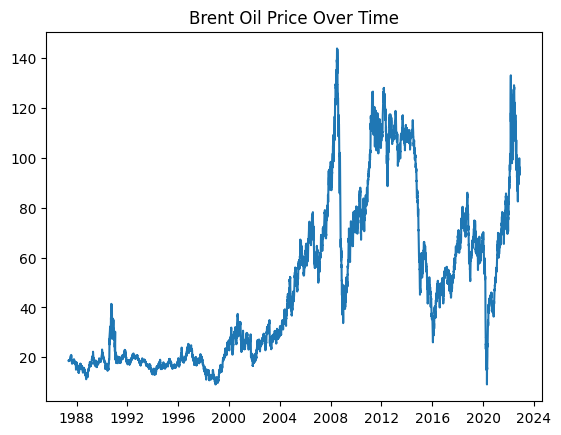

In [ ]:
# Check for stationarity (ARIMA assumes stationarity)
# Perform stationarity tests like Dickey-Fuller test here (not shown in this code)

# Visualize price trend
plt.plot(df["Price"])
plt.title("Brent Oil Price Over Time")
plt.show()

3. Split Data into Training and Testing Sets

In [ ]:
# Define split point for training and testing data (e.g., 80% training, 20% testing)
split_point = int(len(df) * 0.8)
train_data = df[:split_point]
test_data = df[split_point:]

4. Train ARIMA Model:

In [ ]:
# Identify appropriate ARIMA order (p, d, q) using tools like ACF/PACF plots (not shown here)
model = ARIMA(train_data["Price"], order=(1, 1, 1))  # Adjust (p, d, q) as needed
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


5. Make Predictions and Evaluate:

Mean Squared Error (MSE): 616.7243227548117


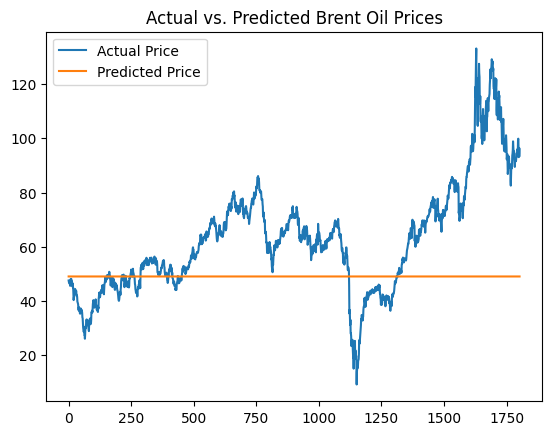

In [ ]:
# Extract the predicted values from the forecast result
# Use the 'values' attribute to get a NumPy array of predicted values
predicted_values = predictions.values

# Calculate Mean Squared Error (MSE)
mse = ((test_data["Price"] - predicted_values)**2).mean()
print(f"Mean Squared Error (MSE): {mse}")

# Visualize actual vs. predicted prices
plt.plot(test_data.index, test_data["Price"], label="Actual Price")
# Use the index of the test data for plotting predictions
plt.plot(test_data.index, predicted_values, label="Predicted Price")
plt.title("Actual vs. Predicted Brent Oil Prices")
plt.legend()
plt.show()









**Goal of the project:**

The project's primary goal is to develop a model that can accurately predict future Brent Oil prices using the ARIMA statistical method. This model leverages historical price data to identify patterns and trends, allowing for informed estimates of future price movements.